# Stage Three: Analysis and Plots 

In [17]:
%matplotlib notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as stats

In [58]:
# Combine the 5 samples into 1 large dataset
sample_data_1r = pd.read_csv('250_sample_1_Results.csv')
sample_data_2r = pd.read_csv('250_sample_2_Results.csv')
sample_data_3r = pd.read_csv('250_sample_3_Results.csv')
sample_data_4r = pd.read_csv('250_sample_4_Results.csv')
sample_data_5r = pd.read_csv('250_sample_5_Results.csv')
sample_data_results = pd.concat ([sample_data_1r,sample_data_2r,sample_data_3r,sample_data_4r,sample_data_5r])
#sample_data_results.head(100)


<IPython.core.display.Javascript object>


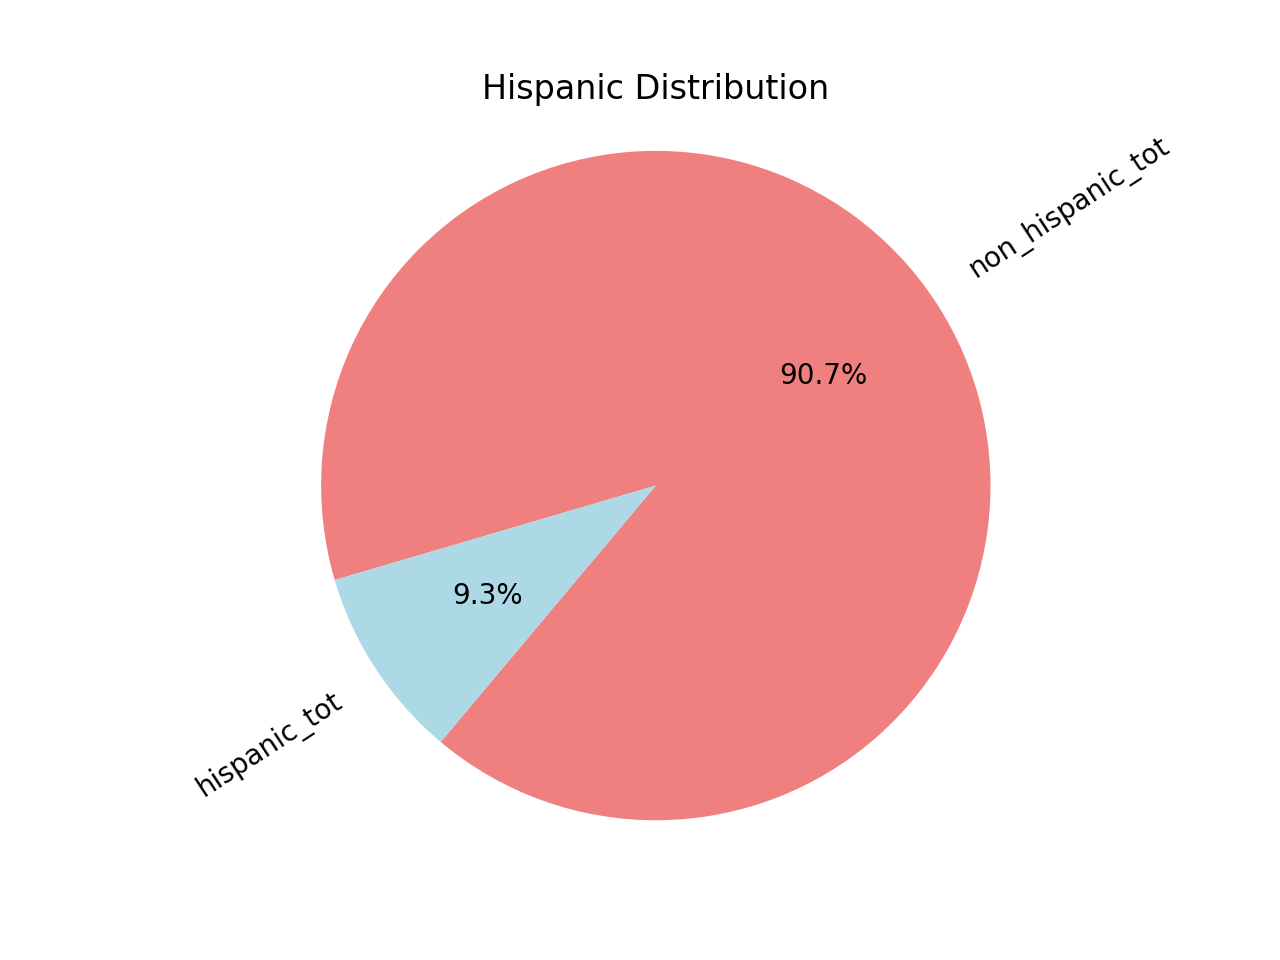

<IPython.core.display.Javascript object>


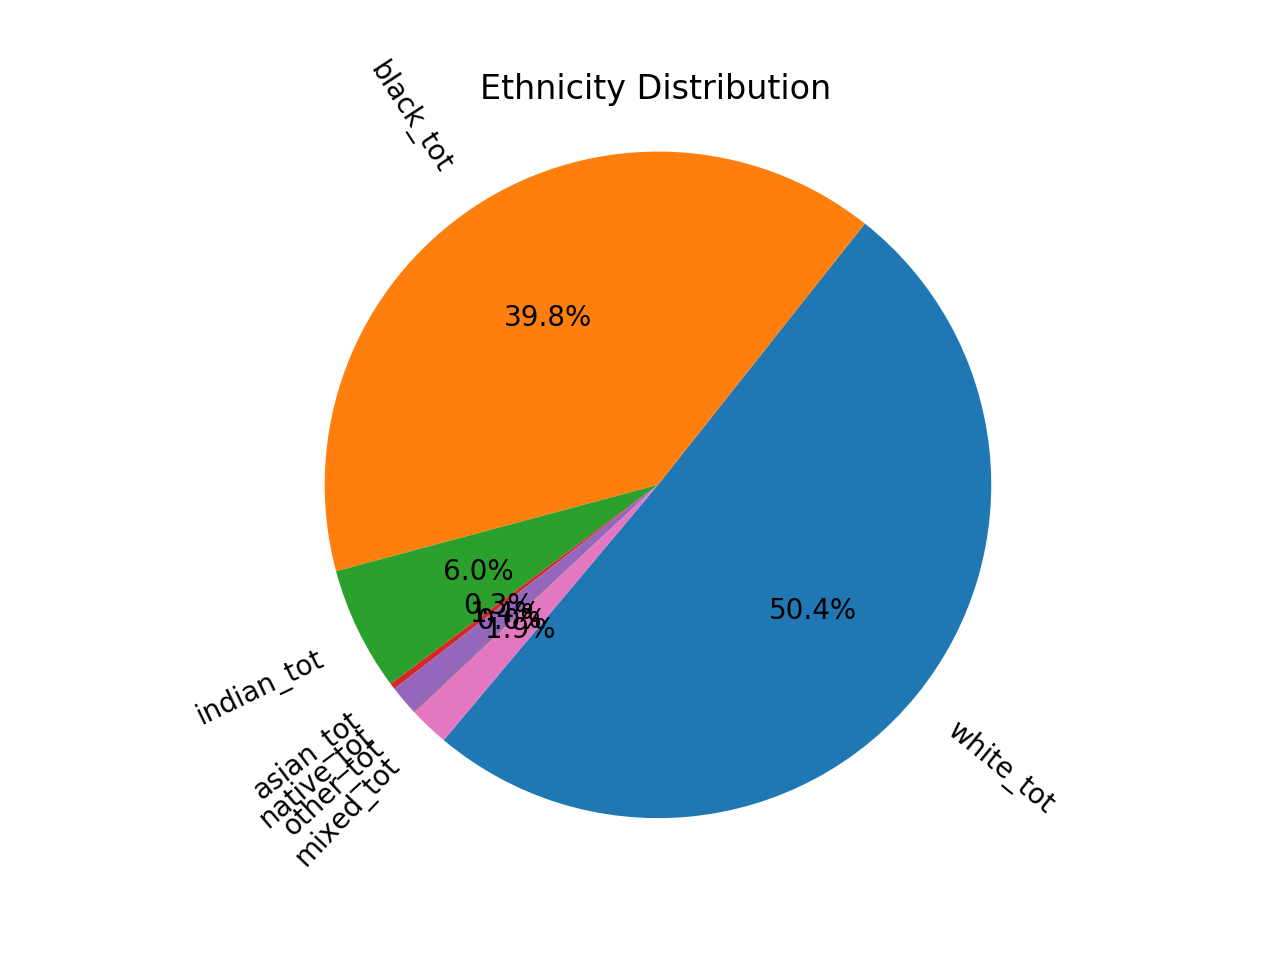

Text(0.5,1,'Ethnicity Distribution')

In [57]:
# Get the sample data ethnicity distriution 

# Hispanic and non hispanic dictribution
hispanic = ['non_hispanic_tot', 'hispanic_tot']
tot_by_his = sample_data_results[hispanic].sum()
plt.figure()
plt.pie(tot_by_his,labels = tot_by_his.index,autopct ='%.1f%%',startangle= 230,rotatelabels = 60,
       colors = ['lightcoral','lightblue'])
plt.axis('equal')
plt.title('Hispanic Distribution')

# Different ethnicity distributioj
plt.figure()
race = ['white_tot', 'black_tot', 'indian_tot', 'asian_tot', 'native_tot', 'other_tot', 'mixed_tot']
tot_by_race = sample_data_results[race].sum()
plt.figure()
plt.pie(tot_by_race,labels = tot_by_race.index,autopct ='%.1f%%',startangle= 230,rotatelabels = 60)
plt.axis('equal')
plt.title('Ethnicity Distribution')

<IPython.core.display.Javascript object>


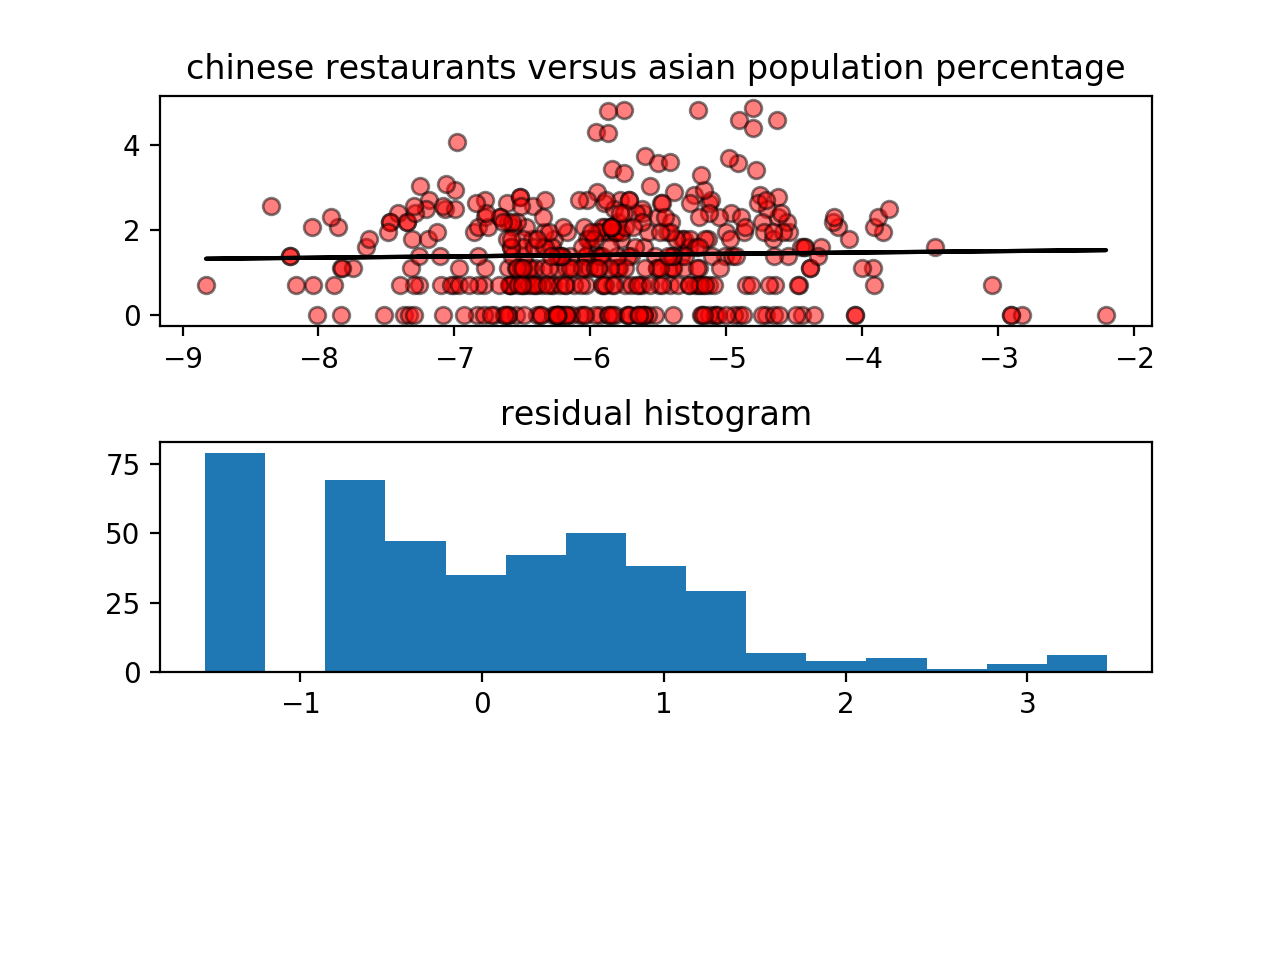

<IPython.core.display.Javascript object>


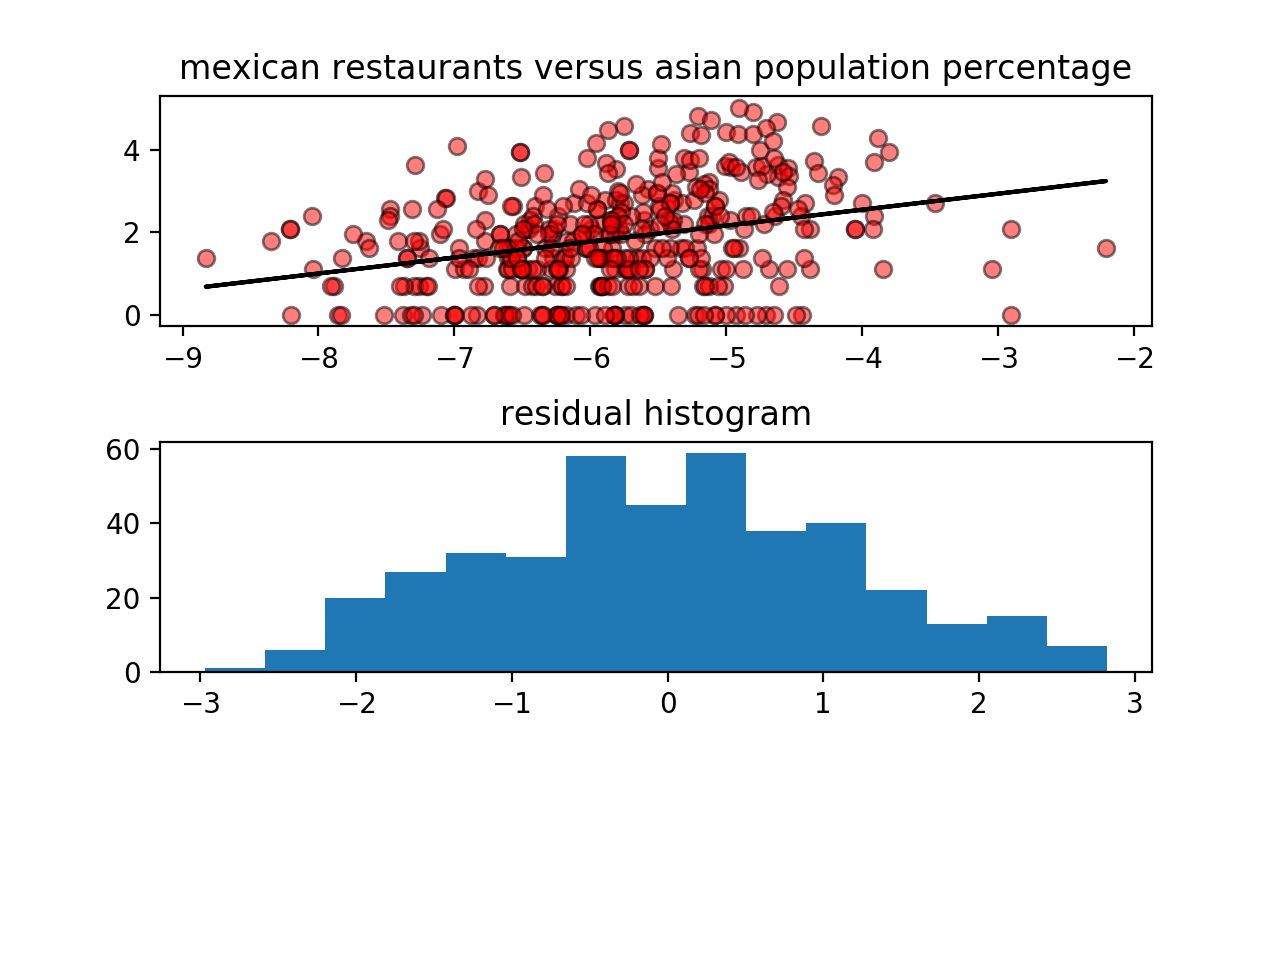

<IPython.core.display.Javascript object>


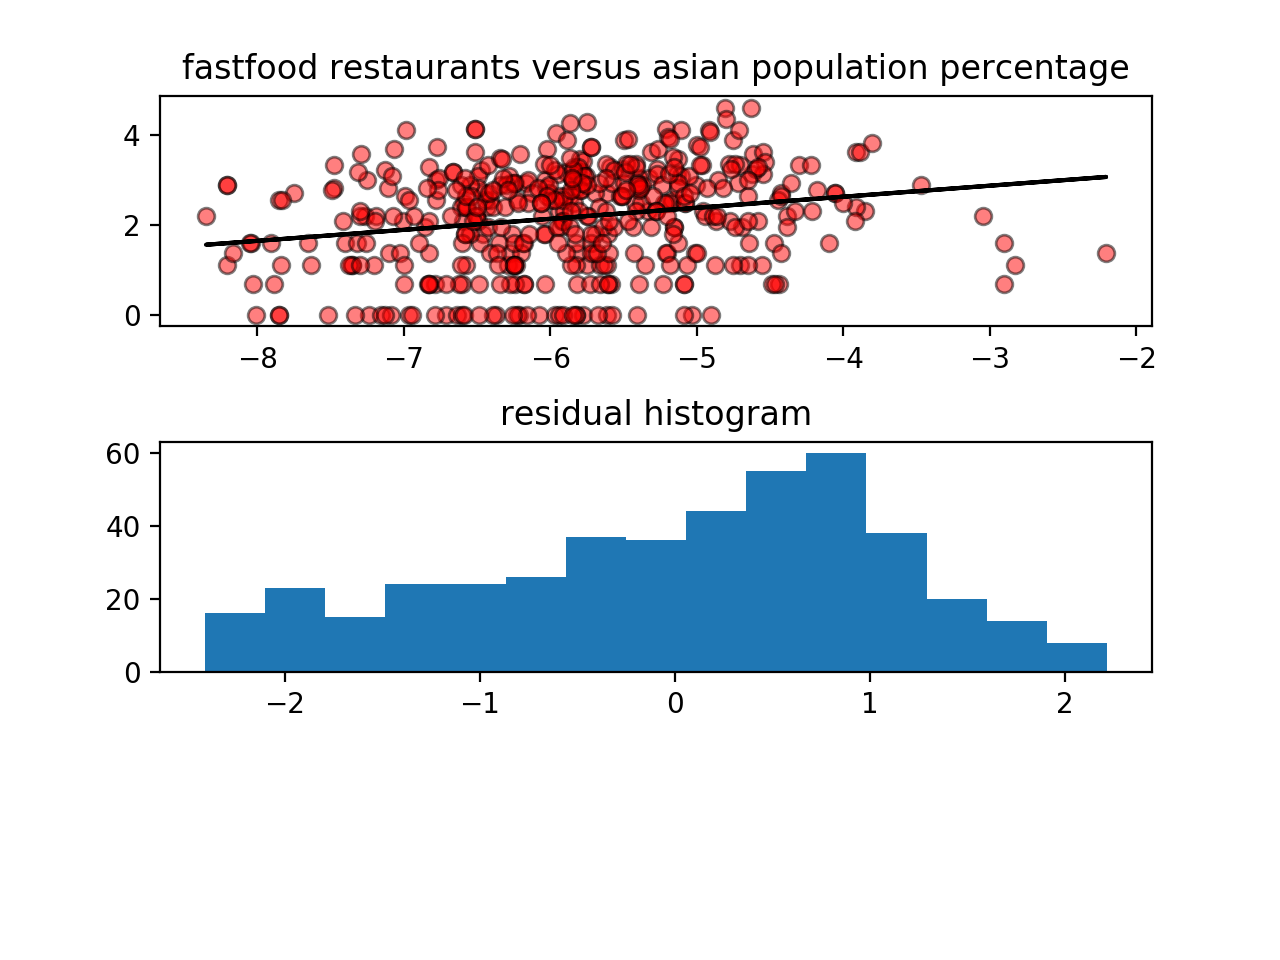

<IPython.core.display.Javascript object>


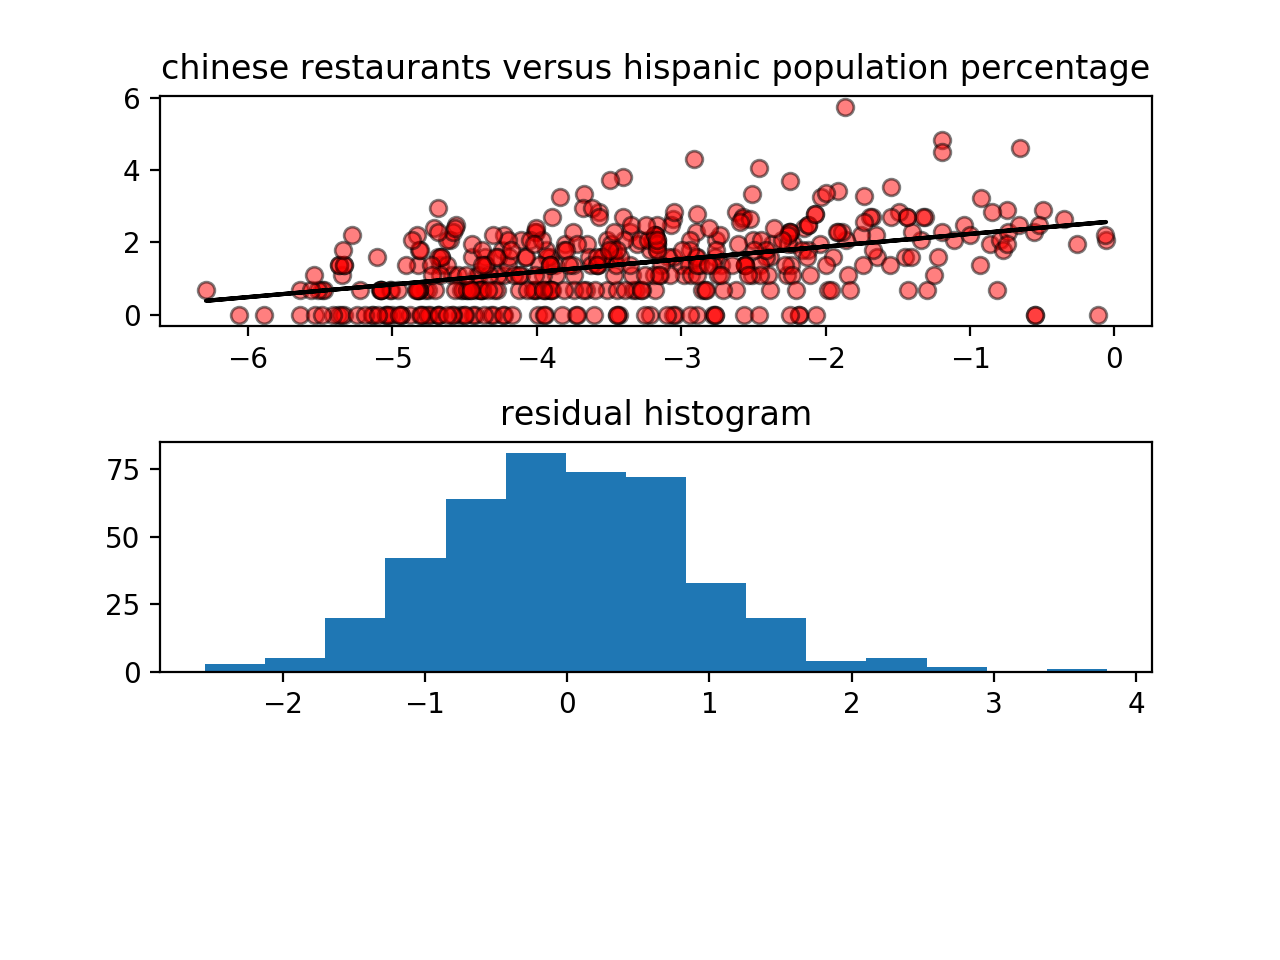

<IPython.core.display.Javascript object>


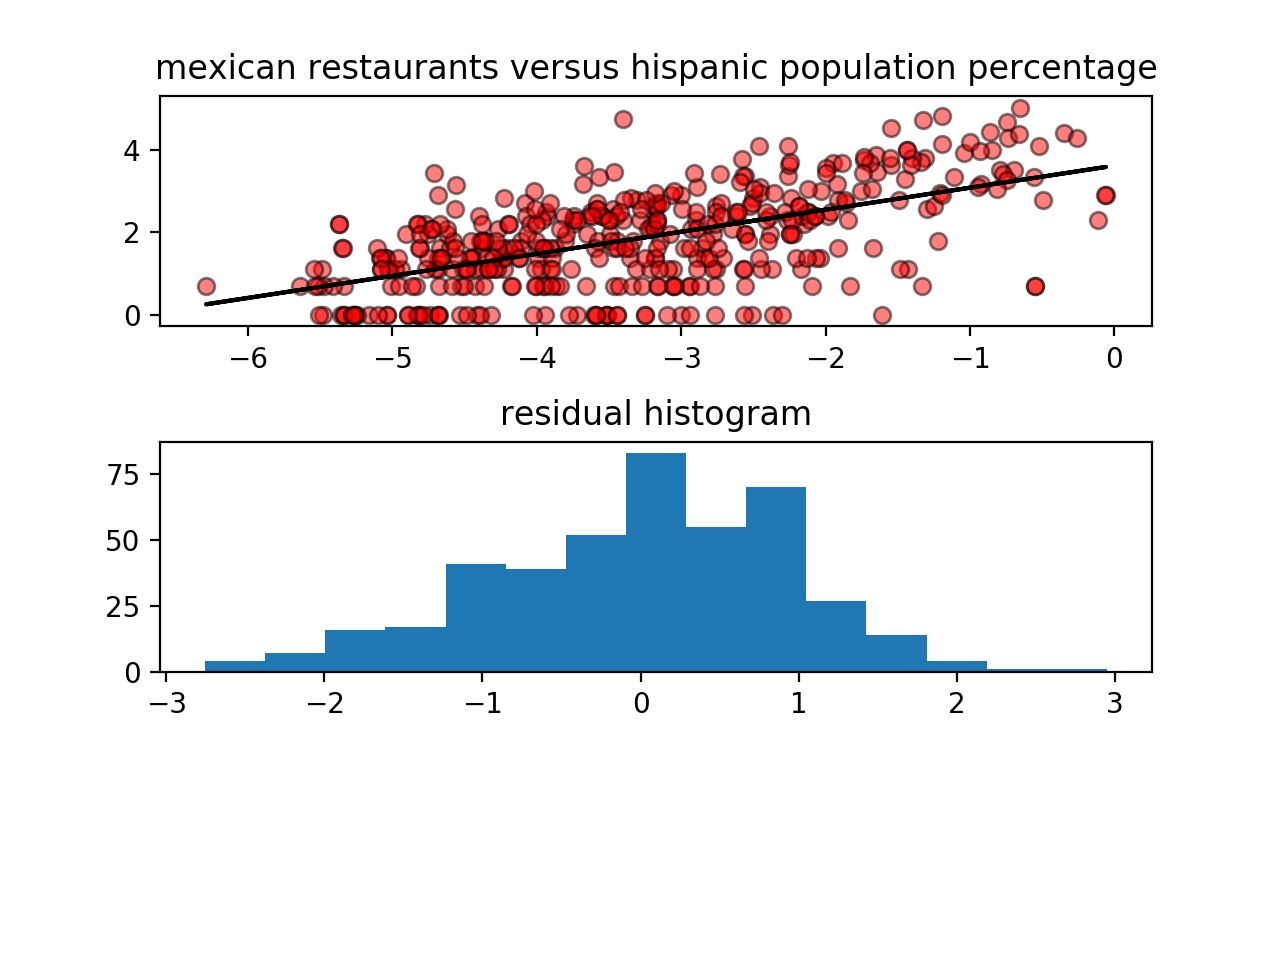

<IPython.core.display.Javascript object>


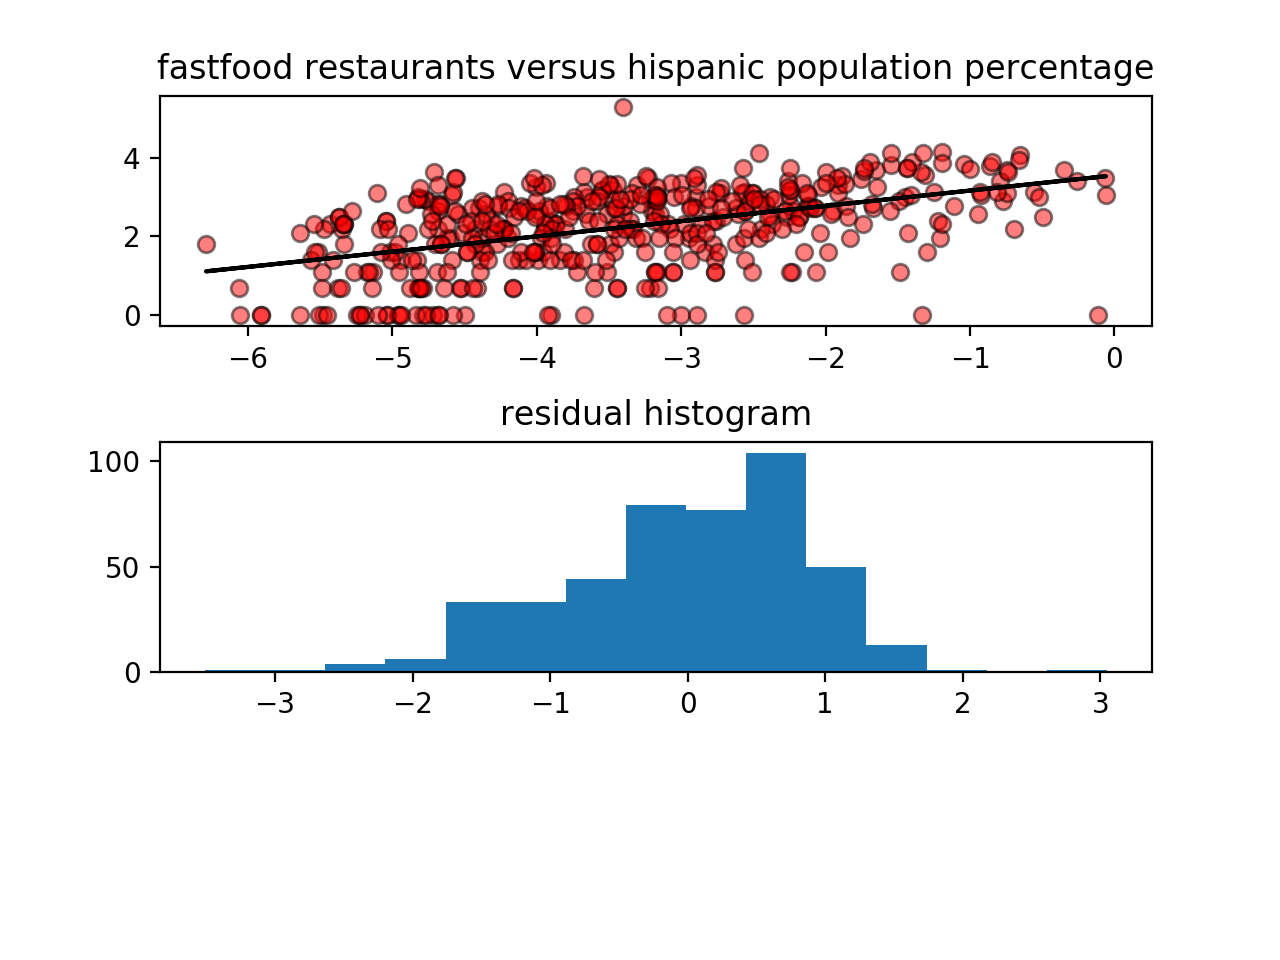

In [5]:
# We are trying to get the relationship for each type of restaurant versus chinese and hispanic
list = ['chinese','mexican','fastfood']
population_list = ['asian','hispanic']
for population_type in population_list:
    for ltype in list:
        foodtype = ltype + '_count'
        pop_type = population_type + '_tot'
        # remove the results with 0 outcomes or 0 populations
        sample_data = sample_data_results.loc[(sample_data_results[foodtype] > 0) & sample_data_results[pop_type] > 0,]
        #get the log of percentage of x race population versus total population
        log_pop_pct = np.log(sample_data[pop_type]/sample_data['total'])
        #get the log of y
        log_count = np.log(sample_data[foodtype])
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_pop_pct,log_count)
        fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols= 1)
        plt.subplots_adjust(left=None, bottom=0.3, right=None, top=0.9, wspace=0.2, hspace=.5)
        ax1.scatter(log_pop_pct,log_count,facecolor = 'red',edgecolors = 'black',alpha = 0.5)
        fit_line = slope *log_pop_pct + intercept
        ax1.plot(log_pop_pct,fit_line,color = 'k')
        ax1.set_title(f'{ltype} restaurants versus {population_type} population percentage')
        residual = log_count - fit_line
        ax2.hist(residual,bins = 15)
        ax2.set_title('residual histogram')
        plt.show()
    
    
    

<IPython.core.display.Javascript object>


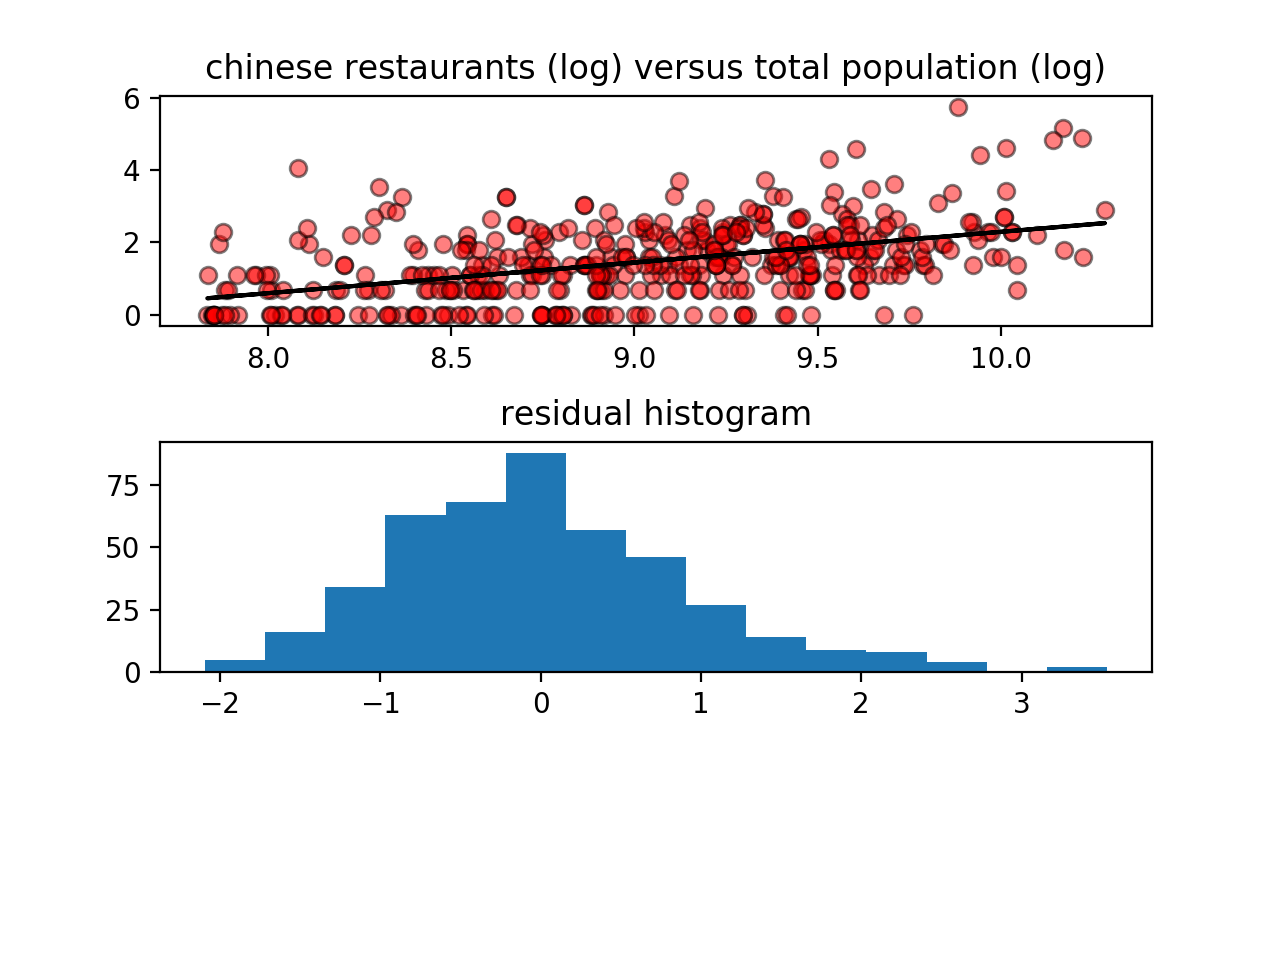

<IPython.core.display.Javascript object>


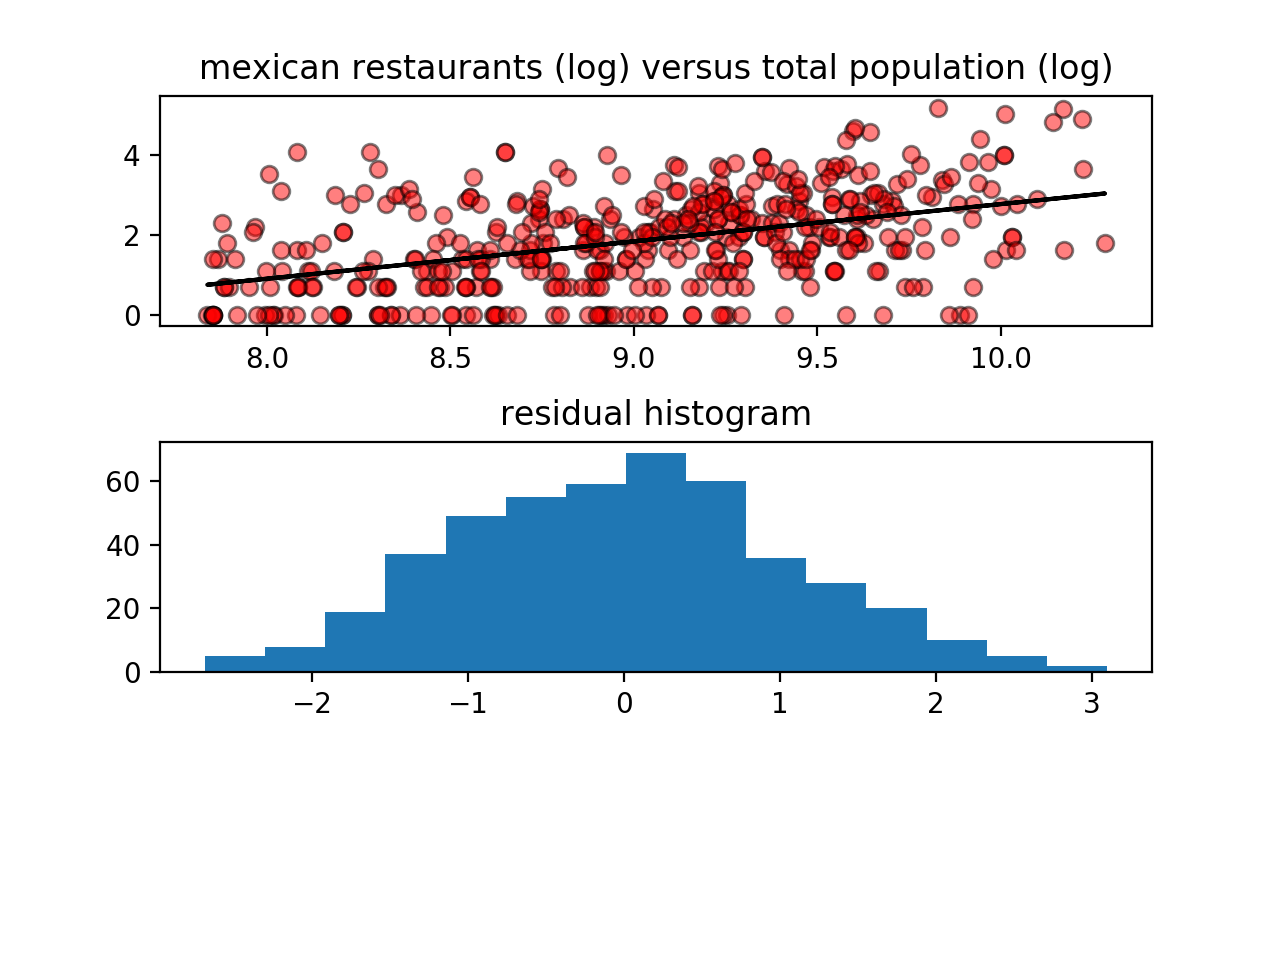

<IPython.core.display.Javascript object>


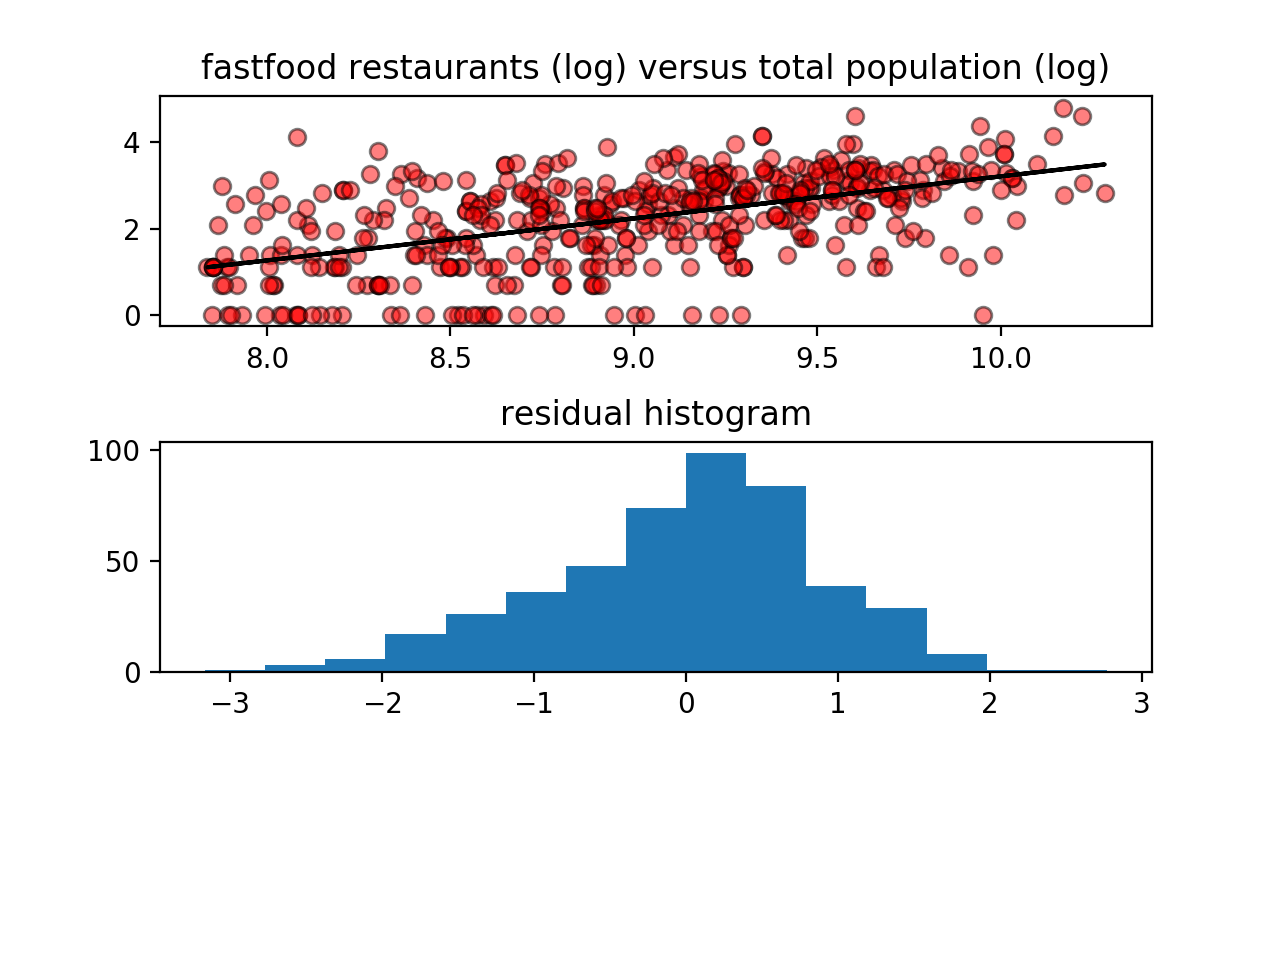

In [6]:
# want to check how each type of the food is relalted with whole population
list = ['chinese','mexican','fastfood']
for ltype in list:
    foodtype = ltype + '_count'
    #pop_type = population_type + '_tot'
    sample_data = sample_data_results.loc[(sample_data_results[foodtype] > 0) & sample_data_results['total'] > 0,]
    #get the log of percentage of x race population versus total population
    log_pop = np.log(sample_data['total'])
    #get the log of y
    log_count = np.log(sample_data[foodtype])
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_pop,log_count)
    fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols= 1)
    plt.subplots_adjust(left=None, bottom=0.3, right=None, top=0.9, wspace=0.2, hspace=.5)
    ax1.scatter(log_pop,log_count,facecolor = 'red',edgecolors = 'black',alpha = 0.5)
    fit_line = slope *log_pop + intercept
    ax1.plot(log_pop,fit_line,color = 'k')
    ax1.set_title(f'{ltype} restaurants (log) versus total population (log)')
    residual = log_count - fit_line
    ax2.hist(residual,bins = 15)
    ax2.set_title('residual histogram')
    plt.show()
    

<IPython.core.display.Javascript object>


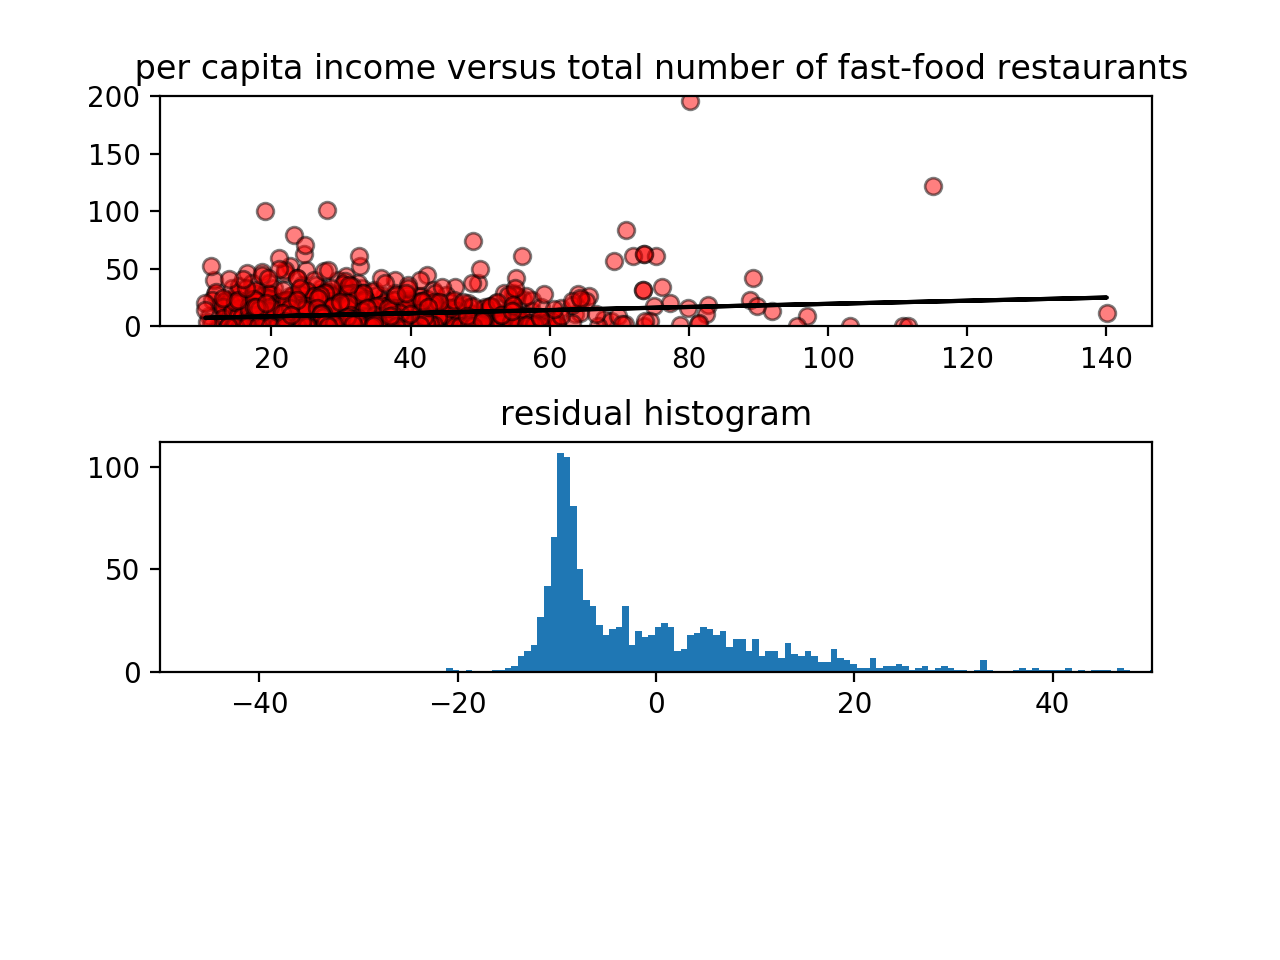

Slope: 0.1353212094969389, P-Value: 9.83962946366815e-07, R Squared: 0.137922235937902


In [24]:
# Check if income is related to number of fast food restaurants
per_cap_icm = sample_data_results['per_capita_income_2017_estimate']/1000
num_fast_food= sample_data_results['fastfood_count']

slope, intercept, r_value, p_value, std_err = stats.linregress(per_cap_icm,num_fast_food)
fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols= 1)
plt.subplots_adjust(left=None, bottom=0.3, right=None, top=0.9, wspace=0.2, hspace=.5)
ax1.scatter(per_cap_icm,num_fast_food,facecolor = 'red',edgecolors = 'black',alpha = 0.5)
fit_line = slope * per_cap_icm + intercept
ax1.plot(per_cap_icm,fit_line,color = 'k')
ax1.set_title(' per capita income versus total number of fast-food restaurants')
ax1.set_ylim(0,200)
residual = num_fast_food - fit_line
ax2.hist(residual,bins = 305)
ax2.set_xlim(-50,50)
ax2.set_title('residual histogram')
plt.show()
print(f'Slope: {slope}, P-Value: {p_value}, R Squared: {r_value}')

# from the plot, actually higher income yields more fastfood restaurant


<IPython.core.display.Javascript object>


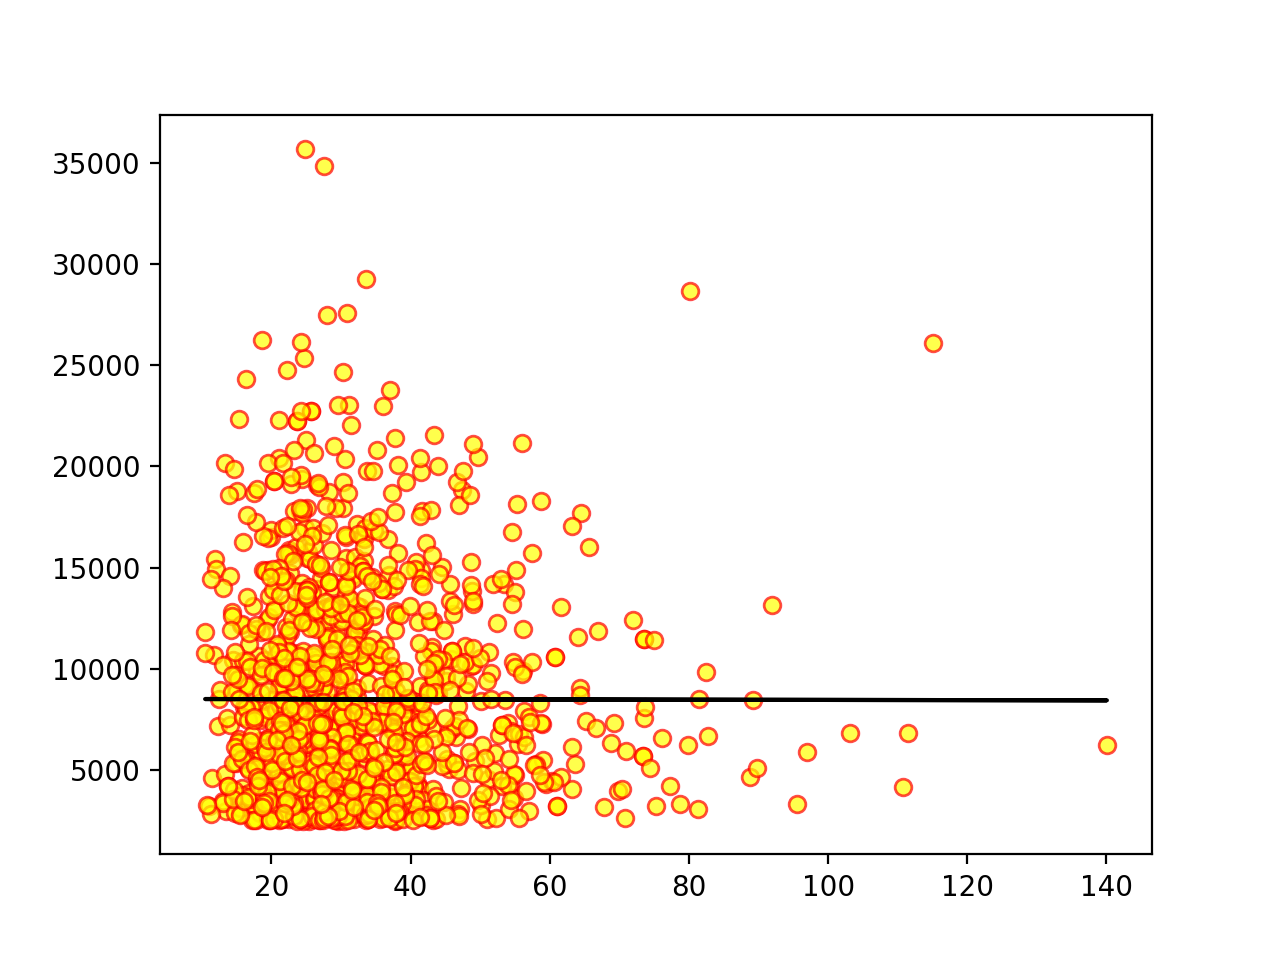

Slope: -0.49025457029003083, P-Value: 0.9619617161074119, R Squared: -0.0013502835351817766


In [25]:
# Check if income and populattion has correlation or not
tot_pop = sample_data_results['total']
fig,ax = plt.subplots()
ax.scatter(per_cap_icm,tot_pop,facecolor = 'yellow',edgecolors = 'red',alpha = 0.7)
slope, intercept, r_value, p_value, std_err = stats.linregress(per_cap_icm,tot_pop)
fit_line = slope * per_cap_icm + intercept
ax.plot(per_cap_icm,fit_line,color = 'k')
print(f'Slope: {slope}, P-Value: {p_value}, R Squared: {r_value}')

# There is no linar correlation between income level and population

<IPython.core.display.Javascript object>


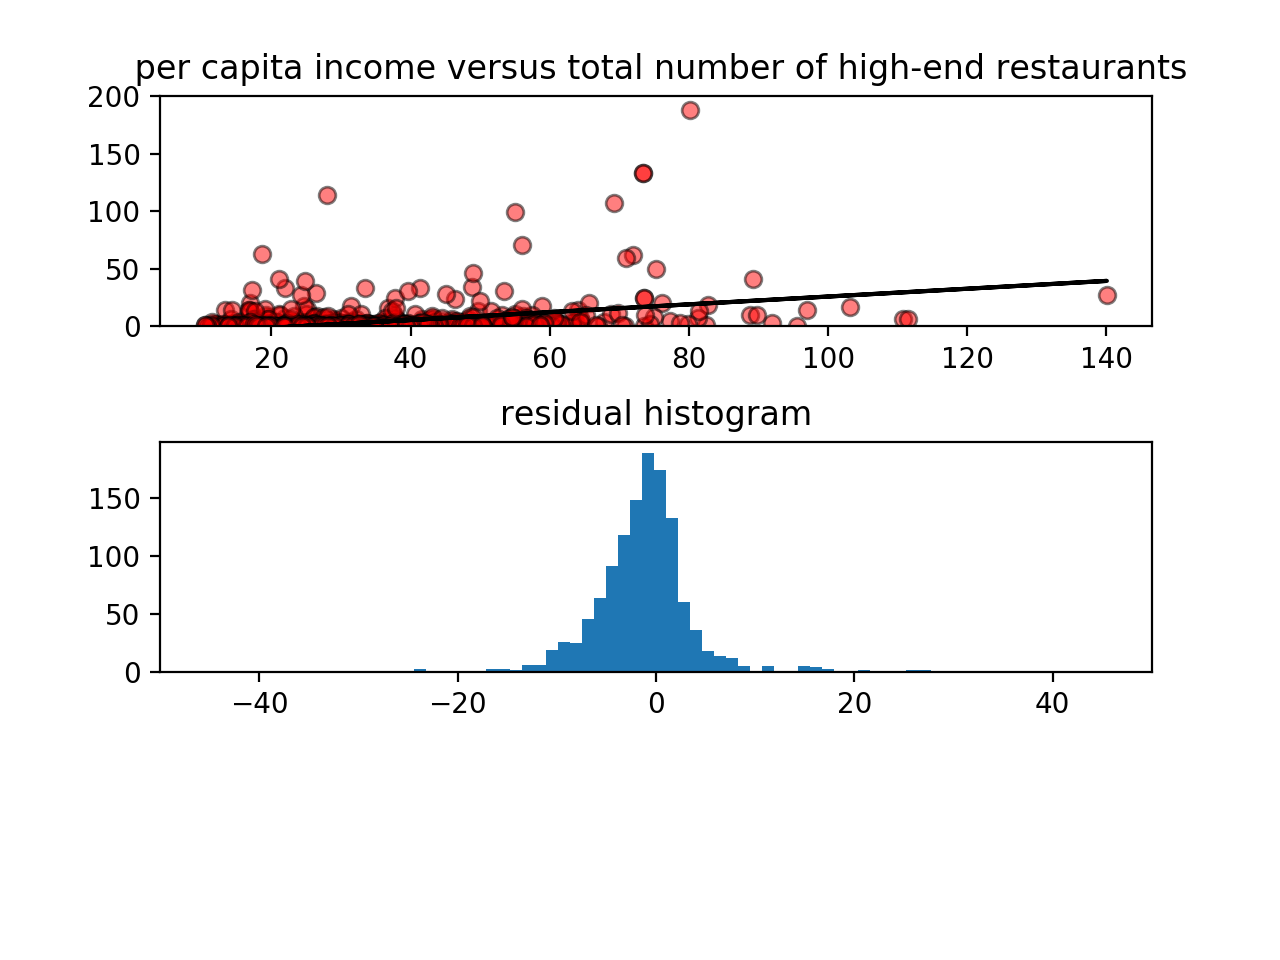

P-Value: 1.3263403219410805e-31, R Squared: 0.32228569714023175


In [22]:
# Check if income is related to number of high-end restaurants
per_cap_icm = sample_data_results['per_capita_income_2017_estimate']/1000
num_high_end = sample_data_results['high_end_count']

slope, intercept, r_value, p_value, std_err = stats.linregress(per_cap_icm,num_high_end)
fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols= 1)
plt.subplots_adjust(left=None, bottom=0.3, right=None, top=0.9, wspace=0.2, hspace=.5)
ax1.scatter(per_cap_icm,num_high_end,facecolor = 'red',edgecolors = 'black',alpha = 0.5)
fit_line = slope * per_cap_icm + intercept
ax1.plot(per_cap_icm,fit_line,color = 'k')
ax1.set_title(' per capita income versus total number of high-end restaurants')
ax1.set_ylim(0,200)
residual = num_high_end - fit_line
ax2.hist(residual,bins = 305)
ax2.set_xlim(-50,50)
ax2.set_title('residual histogram')
plt.show()
print(f'P-Value: {p_value}, R Squared: {r_value}')